## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 3: Python and Tables

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')

### Tables

In [4]:
# Read csv into pandas dataframe
flowers = pd.read_csv('data/flowers.csv')
print(type(flowers))
flowers

<class 'pandas.core.frame.DataFrame'>


,Petals,Name,Color
0,8,lotus,pink
1,34,sunflower,yellow
2,5,rose,red


In [5]:
# Dataframe instance info
print(flowers.columns)
print()
print(flowers.describe())

Index(['Petals', 'Name', 'Color'], dtype='object')

          Petals
count   3.000000
mean   15.666667
std    15.947832
min     5.000000
25%     6.500000
50%     8.000000
75%    21.000000
max    34.000000


In [6]:
# Select single column by name
#  note: standard numpy expressions handy for interactive work, but not optimized
#        see .at, .iat, .loc, .iloc and .ix.
#
# standard numpy expression - returns series
print('Standard numpy expression:')
petals = flowers['Petals']
print(type(petals))
print(petals)
print()

# .loc - returns dataframe
print('.loc expression:')
petals = flowers.loc[:,['Petals']]
print(type(petals))
print(petals)


Standard numpy expression:
<class 'pandas.core.series.Series'>
0     8
1    34
2     5
Name: Petals, dtype: int64

.loc expression:
<class 'pandas.core.frame.DataFrame'>
   Petals
0       8
1      34
2       5


In [7]:
# Select multiple columns by name 

# .loc
select = flowers.loc[:,['Petals','Name']]
select

,Petals,Name
0,8,lotus
1,34,sunflower
2,5,rose


In [8]:
# Drop a column - returns new dataframe
flowers.drop(labels=['Color'], axis=1)

,Petals,Name
0,8,lotus
1,34,sunflower
2,5,rose


### Table Operations: Sorting

In [9]:
movies = pd.read_csv('data/top_movies_2017.csv')
movies.head(5)

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997


In [10]:
movies.sort_values('Gross', ascending=False)
# returns new sorted table by default, inplace=True to modify original table

top_five = movies.sort_values('Gross', ascending=False).head(5)
# returns new sorted table by default, inplace=True to modify original table
top_five

,Title,Studio,Gross,Gross (Adjusted),Year
10,Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015
14,Avatar,Fox,760507625,865082100,2009
4,Titanic,Paramount,658672302,1204368000,1997
23,Jurassic World,Universal,652270625,702747400,2015
28,Marvel's The Avengers,Buena Vista,623357910,683474000,2012


In [11]:
sorted_by_gross = movies.sort_values('Gross', ascending=False)
# sorted_by_gross.sort_values('Studio')

# Drop duplicated from sorted_by_gross -> retain highest for each studio
top_per_studio = sorted_by_gross.drop_duplicates(['Studio'])
top_per_studio = top_per_studio.sort_values('Studio')

top_per_studio.head(5)

,Title,Studio,Gross,Gross (Adjusted),Year
21,The Graduate,AVCO,104945305,760778000,1967
10,Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015
33,Ghostbusters,Columbia,242212467,632734400,1984
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937
34,Shrek 2,Dreamworks,441226247,631642700,2004


In [38]:
#top_per_studio = top_per_studio.sort_values('Gross', ascending=True)

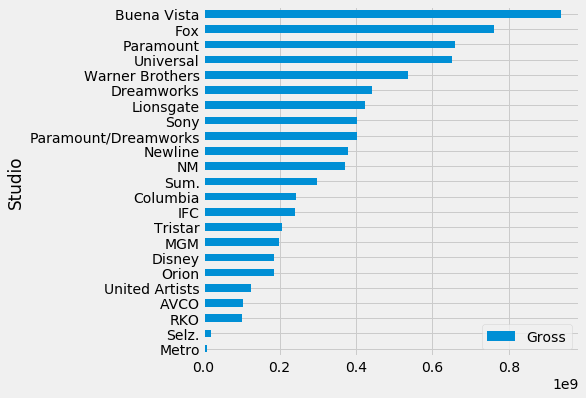

In [56]:
top_per_studio.set_index('Studio')[['Gross']].plot.barh(figsize=(6,6))
plt.gca().invert_yaxis() # Plot top to bottom

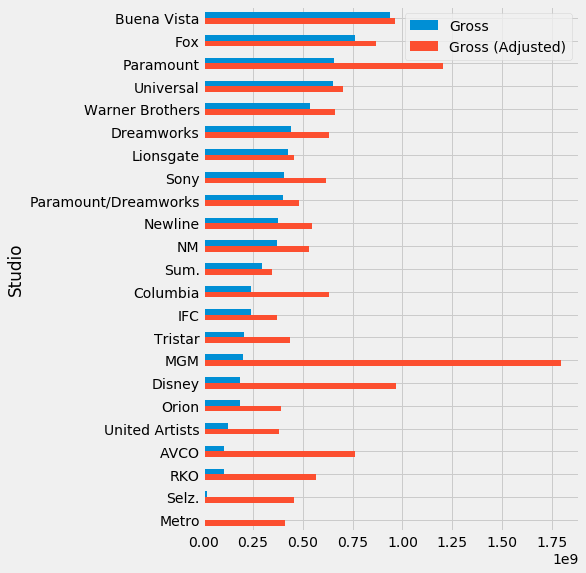

In [55]:
top_per_studio.set_index('Studio')[['Gross', 'Gross (Adjusted)']].\
                                             plot.barh(figsize=(6,9))
plt.gca().invert_yaxis() # Plot top to bottom

In [14]:
top_per_studio = top_per_studio.sort_values('Year')
top_per_studio.head(5)

,Title,Studio,Gross,Gross (Adjusted),Year
123,The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937
0,Gone with the Wind,MGM,198676459,1796176700,1939
49,Bambi,RKO,102247150,566403700,1942
99,Duel in the Sun,Selz.,20408163,453571400,1946


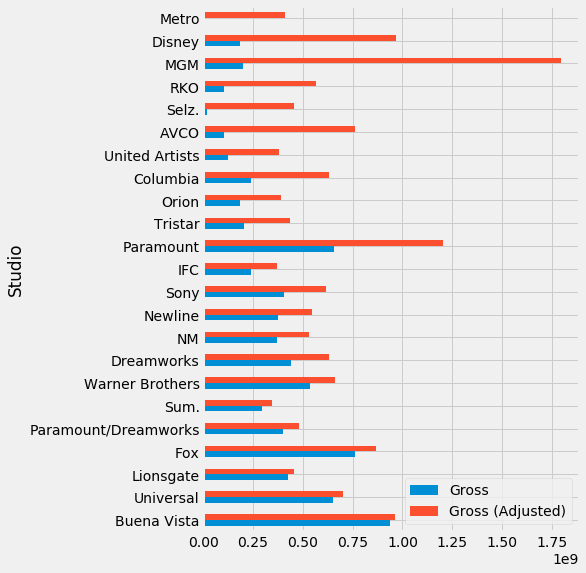

In [16]:
top_per_studio = top_per_studio.sort_values('Year', ascending=False)
just_revenues = top_per_studio.loc[:, ['Studio', 'Gross', 'Gross (Adjusted)']]
just_revenues.plot.barh('Studio', figsize=(6,9))